In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import visualkeras
from tensorflow.keras.utils import plot_model
import pydot
import matplotlib.pyplot as plt

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load training dataset
train_dataset = pd.read_csv('/content/drive/MyDrive/dataset/sign_mnist_train/sign_mnist_train.csv')

# Load testing dataset
test_dataset = pd.read_csv('/content/drive/MyDrive/dataset/sign_mnist_test/sign_mnist_test.csv')

# Split training dataset into labels and pixels
train_labels = train_dataset.iloc[:, 0]
train_pixels = train_dataset.iloc[:, 1:]

# Split testing dataset into labels and pixels
test_labels = test_dataset.iloc[:, 0]
test_pixels = test_dataset.iloc[:, 1:]

# Reshape pixel values into images
train_images = train_pixels.values.reshape(-1, 28, 28)
test_images = test_pixels.values.reshape(-1, 28, 28)

# Normalize pixel values to range [0, 1] (optional but recommended for neural networks)
train_images = train_images / 255.0
test_images = test_images / 255.0

print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)


Train Images Shape: (27455, 28, 28)
Train Labels Shape: (27455,)
Test Images Shape: (7172, 28, 28)
Test Labels Shape: (7172,)


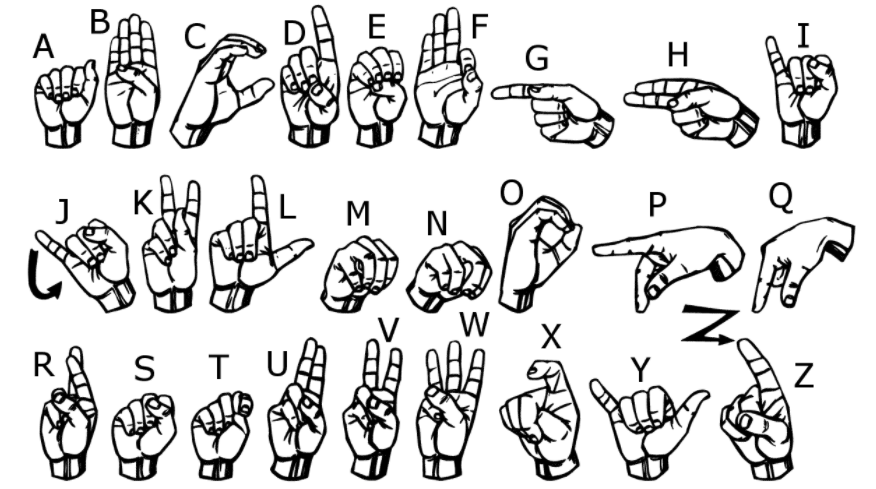

In [25]:
from IPython.display import Image
Image("/content/drive/MyDrive/dataset/american_sign_language.PNG")


In [13]:
# Define the CNN model
model = Sequential()

# Step 1: First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Here, we use 32 filters of size 3x3 with ReLU activation function.
# Input shape is (28, 28, 1) for grayscale images.

# Step 2: Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
# Here, we use 64 filters of size 3x3 with ReLU activation function.
# No need to specify input shape after the first layer.

# Step 3: Activation Function (ReLU)
# ReLU activation is applied after each convolutional layer automatically.

# Step 4: Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Max pooling layer with pool size 2x2 to down-sample the feature maps.

# Step 5: Flatten Layer
model.add(Flatten())
# Flatten the output of the convolutional layers into a single vector.

# Step 6: Fully Connected Layer (Dense)
model.add(Dense(128, activation='relu'))
# Fully connected layer with 128 neurons and ReLU activation.

# Step 7: Dropout Layer
model.add(Dropout(0.2))
# Dropout layer with dropout rate of 0.2 to prevent overfitting.

# Step 8: Output Layer
model.add(Dense(26, activation='softmax'))
# Output layer with 26 nodes (one for each sign language letter) and softmax activation.

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

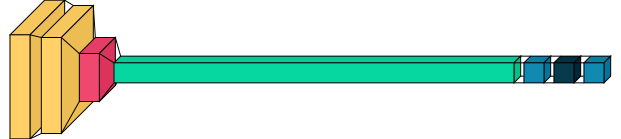

In [14]:
visualkeras.layered_view(model)

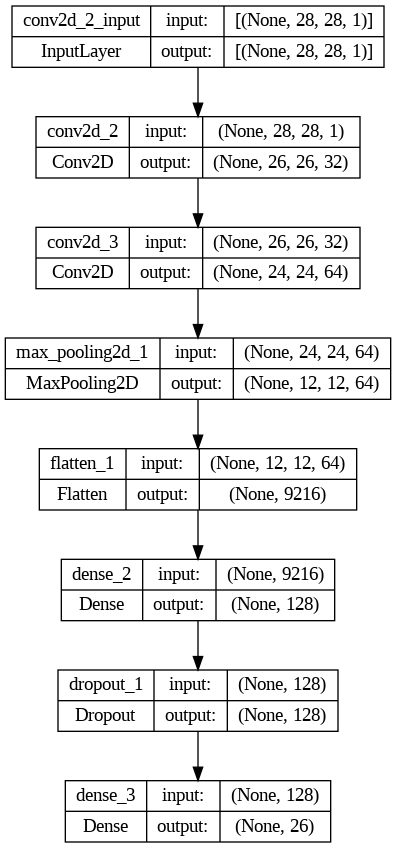

In [15]:
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

In [19]:
# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 10 epochs using the training dataset
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
858/858 [==============================] - 81s 93ms/step - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.7386 - val_accuracy: 0.8521
Epoch 2/10
858/858 [==============================] - 82s 96ms/step - loss: 0.0215 - accuracy: 0.9936 - val_loss: 0.7131 - val_accuracy: 0.8797
Epoch 3/10
858/858 [==============================] - 80s 93ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.9225 - val_accuracy: 0.8688
Epoch 4/10
858/858 [==============================] - 87s 101ms/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 0.7641 - val_accuracy: 0.8813
Epoch 5/10
858/858 [==============================] - 87s 102ms/step - loss: 0.0108 - accuracy: 0.9964 - val_loss: 0.8152 - val_accuracy: 0.8919
Epoch 6/10
858/858 [==============================] - 79s 93ms/step - loss: 0.0103 - accuracy: 0.9963 - val_loss: 0.9363 - val_accuracy: 0.8799
Epoch 7/10
858/858 [==============================] - 81s 94ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.7412 - val_accurac

In [20]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

225/225 [==============================] - 7s 29ms/step - loss: 0.8640 - accuracy: 0.8901
Test Loss: 0.8639644384384155
Test Accuracy: 0.8901282548904419


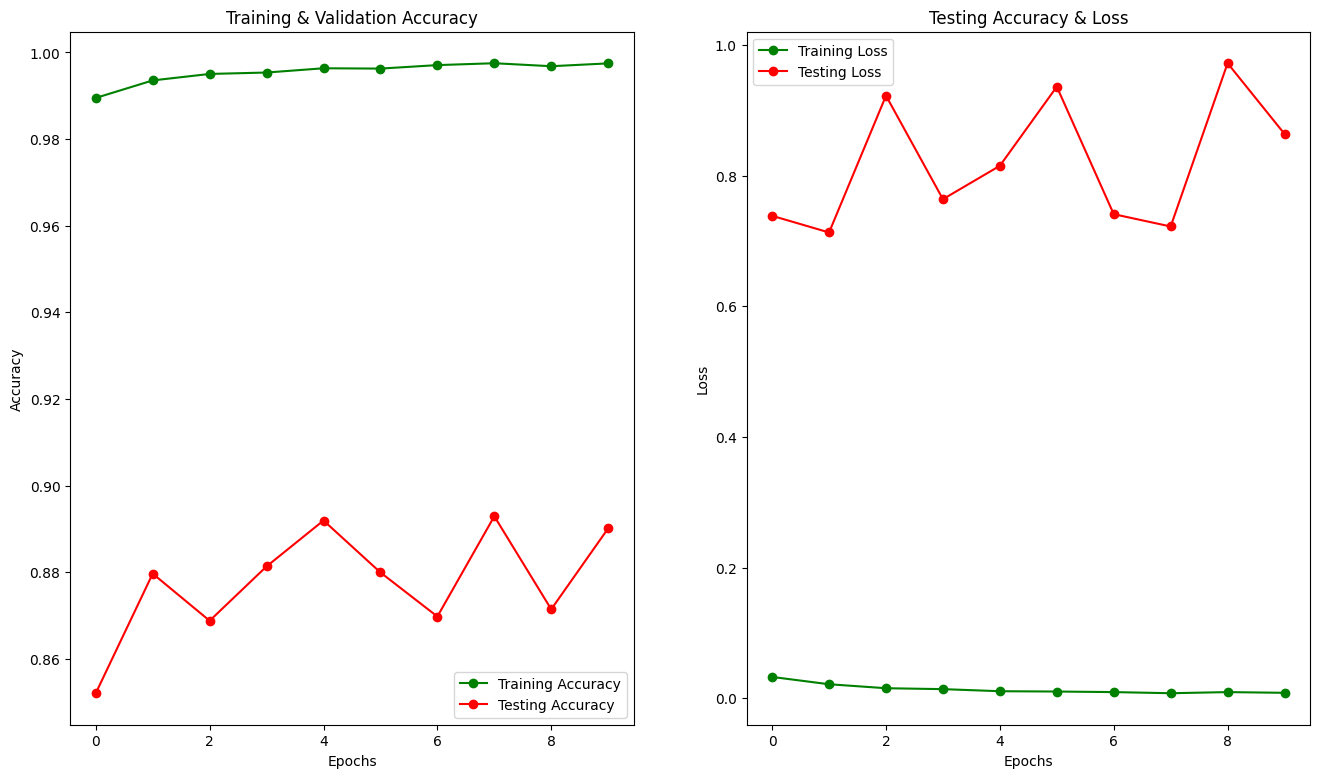

In [23]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [26]:
from keras.layers import Dropout

# Define the CNN model
model = Sequential()

# Step 1: First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Step 2: Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Step 3: Activation Function (ReLU)
# ReLU activation is applied after each convolutional layer automatically.

# Step 4: Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 5: Dropout Layer (after the first convolutional layer)
model.add(Dropout(0.3))  # Add dropout layer with dropout rate of 0.3

# Step 6: Flatten Layer
model.add(Flatten())

# Step 7: Fully Connected Layer (Dense)
model.add(Dense(128, activation='relu'))

# Step 8: Dropout Layer (after the fully connected layer)
model.add(Dropout(0.2))  # Keep the existing dropout layer with dropout rate of 0.2

# Step 9: Output Layer
model.add(Dense(26, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

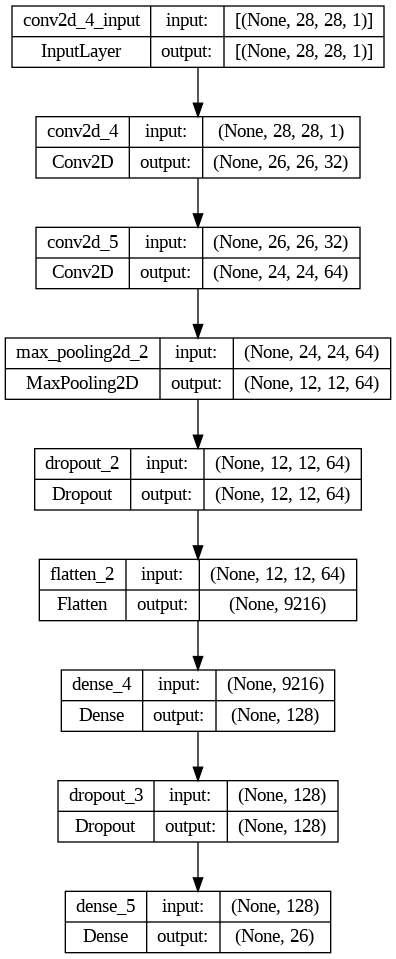

In [27]:
plot_model(model, to_file='cnn_model1.png', show_shapes=True, show_layer_names=True)

In [28]:
# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 10 epochs using the training dataset
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
858/858 [==============================] - 89s 103ms/step - loss: 0.6722 - accuracy: 0.7994 - val_loss: 0.4941 - val_accuracy: 0.8798
Epoch 2/10
858/858 [==============================] - 87s 101ms/step - loss: 0.0442 - accuracy: 0.9883 - val_loss: 0.5649 - val_accuracy: 0.8772
Epoch 3/10
858/858 [==============================] - 87s 102ms/step - loss: 0.0228 - accuracy: 0.9937 - val_loss: 0.4797 - val_accuracy: 0.8912
Epoch 4/10
858/858 [==============================] - 85s 99ms/step - loss: 0.0189 - accuracy: 0.9945 - val_loss: 0.5951 - val_accuracy: 0.8912
Epoch 5/10
858/858 [==============================] - 82s 96ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.5579 - val_accuracy: 0.8988
Epoch 6/10
858/858 [==============================] - 85s 100ms/step - loss: 0.0121 - accuracy: 0.9964 - val_loss: 0.6455 - val_accuracy: 0.8963
Epoch 7/10
858/858 [==============================] - 88s 103ms/step - loss: 0.0114 - accuracy: 0.9960 - val_loss: 0.6809 - val_accu

In [29]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

225/225 [==============================] - 5s 21ms/step - loss: 0.7589 - accuracy: 0.8964
Test Loss: 0.7589040994644165
Test Accuracy: 0.8964026570320129
